<p style="font-size: 20px; margin-bottom: 3px; margin-top: 3px;">By: Ayushman Anupam</p>  
<p style="font-size: 20px; margin-top: 3px;">GitHub Link: <a href="https://github.com/AyushmanGHub">https://github.com/AyushmanGHub</a></p>

### Topic for Project: Churn Prediction Model for Subscription Services
<div style="text-align: center;">
  <span style="color: #4A90E2; font-size: 35px; font-weight: bold;">ChurnPredict: Unlocking Subscription Insights</span>
  <hr style="border: 1px dashed grey; width: 80%;"/>
</div>


### -------------- Importing needed libraries --------------

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.metrics import RocCurveDisplay


## -------------------- Data Importing and Preprocessing -----------------------

In [88]:
df = pd.read_csv(r"DataSet.csv")

print(df.shape)
print(df.columns)

(125000, 20)
Index(['customer_id', 'age', 'location', 'subscription_type', 'payment_plan',
       'num_subscription_pauses', 'payment_method',
       'customer_service_inquiries', 'signup_date', 'weekly_hours',
       'average_session_length', 'song_skip_rate', 'weekly_songs_played',
       'weekly_unique_songs', 'num_favorite_artists', 'num_platform_friends',
       'num_playlists_created', 'num_shared_playlists',
       'notifications_clicked', 'churned'],
      dtype='object')


In [198]:
import pandas as pd

# Assuming the original dataframe is named 'df'
# Copy the original dataframe to a new dataframe
data = df.copy()

# Encode categorical columns using one-hot encoding with 1s and 0s
categorical_columns = ['location', 'subscription_type', 'payment_plan', 'payment_method', 'customer_service_inquiries']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True, dtype=int)

# Convert 'signup_date' negative days to positive
data['signup_date'] = data['signup_date'].abs()
data.rename(columns={'signup_date': 'subscription_length'}, inplace=True)

# Display the updated dataframe
data.head()


,customer_id,age,num_subscription_pauses,subscription_length,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,...,location_Wisconsin,subscription_type_Free,subscription_type_Premium,subscription_type_Student,payment_plan_Yearly,payment_method_Credit Card,payment_method_Debit Card,payment_method_Paypal,customer_service_inquiries_Low,customer_service_inquiries_Medium
0,1,32,2,1606,22.391362,105.394516,0.176873,169,109,18,...,0,1,0,0,1,0,0,1,0,1
1,2,64,3,2897,29.294210,52.501115,0.981811,55,163,44,...,0,1,0,0,0,0,0,1,1,0
2,3,51,2,348,15.400312,24.703696,0.048411,244,117,20,...,0,0,1,0,1,1,0,0,0,0
3,4,63,4,2894,22.842084,83.595480,0.035691,442,252,47,...,0,0,0,0,1,0,0,0,0,1
4,5,54,3,92,23.151163,52.578266,0.039738,243,230,41,...,0,0,0,0,0,0,0,1,0,0


In [37]:
data.shape

(125000, 42)

In [117]:
X = data.drop(columns=['churned','customer_id'])
y = data['churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ------------ Exploratory Data Analysis --------------

#### ------------ Categorical Features Analysis ----------------------

C:\Users\ayush\AppData\Local\Temp\ipykernel_8792\4192775496.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set2')
C:\Users\ayush\AppData\Local\Temp\ipykernel_8792\4192775496.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set2')
C:\Users\ayush\AppData\Local\Temp\ipykernel_8792\4192775496.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set2')
C:\Users\ayush\AppData\Local\Temp\ipykernel_8792\4192775496.py:22: Future

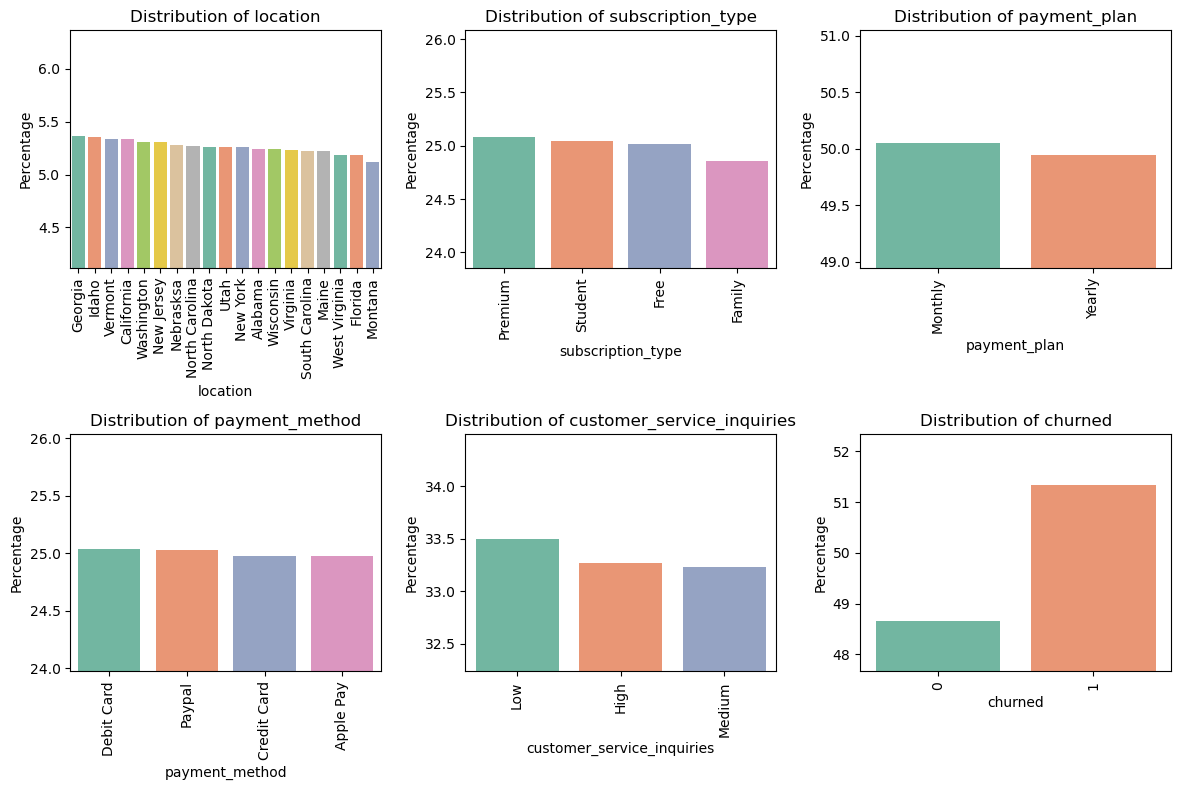

In [177]:
# Categorical columns (excluding 'churned' if it's already a column in the dataset)
categorical_cols = df.select_dtypes(include=['object']).columns

# Include 'churned' in the categorical columns for plotting if it exists
if 'churned' not in categorical_cols:
    categorical_cols = categorical_cols.append(pd.Index(['churned']))

# Plotting categorical distributions as percentages
plt.figure(figsize=(12, 8))

for idx, col in enumerate(categorical_cols):
    plt.subplot(2, 3, idx + 1)
    
    # Calculate percentage distribution for categorical columns
    if col == 'churned':
        # For the 'churned' column, plot percentage distribution
        data = df[col].value_counts(normalize=True) * 100
        sns.barplot(x=data.index, y=data.values, palette='Set2')
    else:
        # For other categorical columns
        data = df[col].value_counts(normalize=True) * 100
        sns.barplot(x=data.index, y=data.values, palette='Set2')

    # Set title and x-axis labels
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Percentage')
    
    # Rotate x-axis labels
    plt.xticks(rotation=90)
    
    # Adjust the y-axis to be min-2 to max+1
    plt.ylim(data.min() - 1, data.max() + 1)

plt.tight_layout()
plt.show()


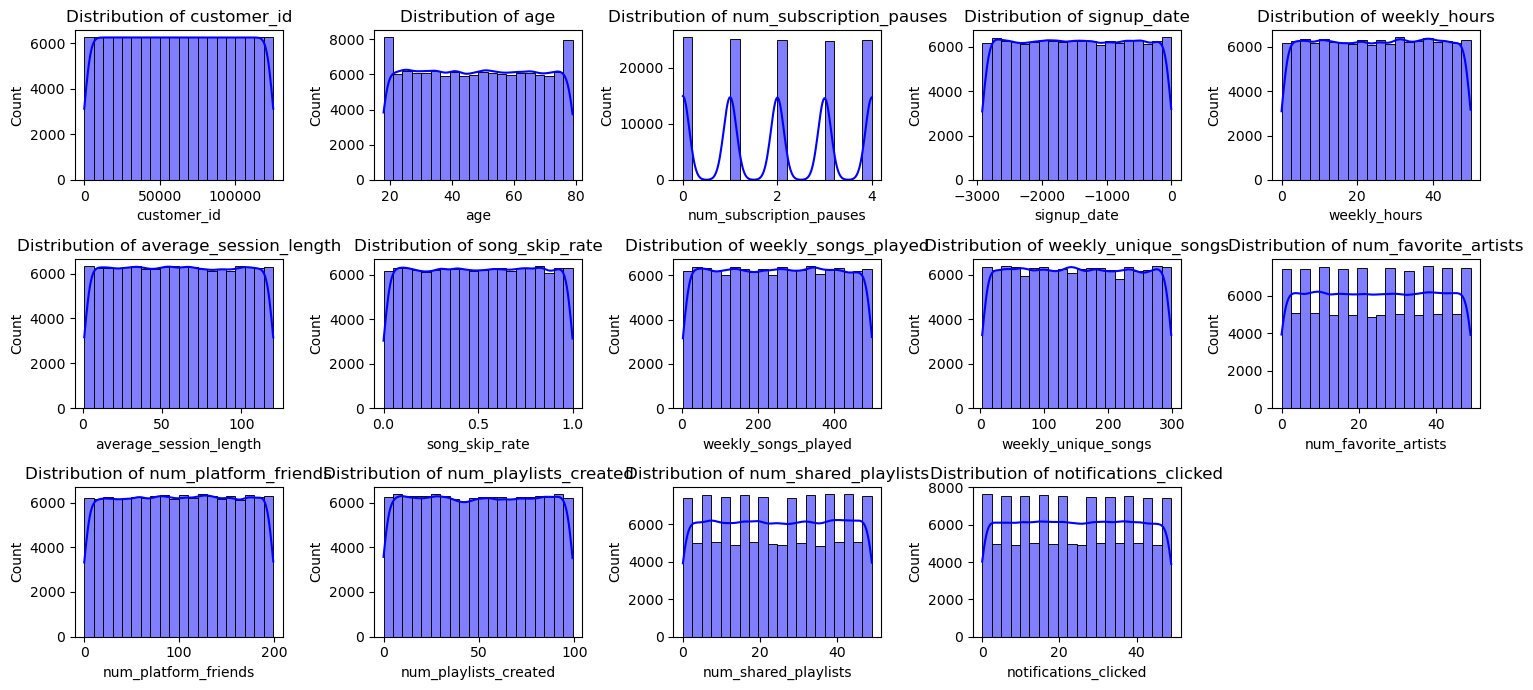

In [195]:
# Convert Index to a list before using remove
numerical_cols = list(df.select_dtypes(include=['float64', 'int64']).columns)

# Now you can remove the 'churned' column
numerical_cols.remove("churned")
# Set up the grid for 5 rows and 3 columns (15 plots)
rows = 3
cols = 5

plt.figure(figsize=(15, 7))  # Adjust the figure size for 15 plots

for idx, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, idx + 1)
    sns.histplot(df[col], kde=True, bins=20, color='blue')

    plt.title(f"Distribution of {col}",size = 12)
    
plt.tight_layout()
plt.show()


## Logistic Regression on Unnormalized Data

In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
logreg = LogisticRegression(max_iter=10000)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization types
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Solver options for LogisticRegression
    'l1_ratio': [0.1, 0.5, 0.9]  # ElasticNet regularization, only used when 'penalty' is 'elasticnet'
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best cross-validation score
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation Score: {best_score}")

# Refit the Logistic Regression model using the best hyperparameters
best_logreg = grid_search.best_estimator_

# Predict on the test data
y_pred_logreg_tuned = best_logreg.predict(X_test)

# Evaluate the tuned model
from sklearn.metrics import accuracy_score, classification_report

# Accuracy score
accuracy = accuracy_score(y_test, y_pred_logreg_tuned)
print(f"Accuracy of Tuned Logistic Regression: {accuracy}")

# Classification report
print(classification_report(y_test, y_pred_logreg_tuned))


Fitting 5 folds for each of 120 candidates, totalling 600 fits


KeyboardInterrupt: 

In [86]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

logreg_accuracy_score = accuracy_score(y_test, y_pred_logreg)
logreg_precision_score = precision_score(y_test, y_pred_logreg)
logreg_recall_score = recall_score(y_test, y_pred_logreg)
logreg_roc_auc_score = roc_auc_score(y_test, y_pred_logreg)

print(f'Logistic Regression Accuracy: {logreg_accuracy_score}')
print(f'Logistic Regression Precision: {logreg_precision_score}')
print(f'Logistic Regression Recall: {logreg_recall_score}')
print(f'Logistic Regression AUC-ROC: {logreg_roc_auc_score}')


Logistic Regression Accuracy: 0.68
Logistic Regression Precision: 0.6391752577319587
Logistic Regression Recall: 0.6813186813186813
Logistic Regression AUC-ROC: 0.6801088819437442


c:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


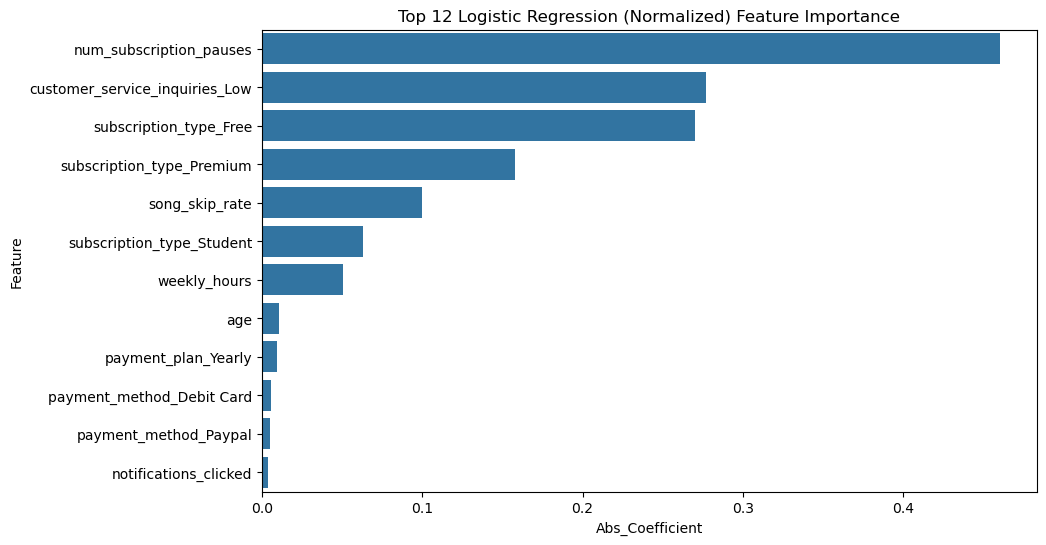

In [216]:
# Get the coefficients from the Logistic Regression model
coefficients = logreg.coef_[0]

# Create a DataFrame with feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients to show the most important features
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Select the top 10 most important features
top_10_feature_importance = feature_importance.head(12)

# Plot the top 10 feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=top_10_feature_importance)
plt.title('Top 12 Logistic Regression (Normalized) Feature Importance')
plt.show()


## Logistic Regression on Normalized Data

In [122]:
logreg_n = LogisticRegression()
logreg_n.fit(X_train_scaled, y_train)
y_pred_logreg_normalized = logreg_n.predict(X_test_scaled)

logreg_accuracy_score_normalized = accuracy_score(y_test, y_pred_logreg_normalized)
logreg_precision_score_normalized = precision_score(y_test, y_pred_logreg_normalized)
logreg_recall_score_normalized = recall_score(y_test, y_pred_logreg_normalized)
logreg_roc_auc_score_normalized = roc_auc_score(y_test, y_pred_logreg_normalized)

print(f'Logistic Regression (normalized) Accuracy: {logreg_accuracy_score_normalized}')
print(f'Logistic Regression (normalized) Precision: {logreg_precision_score_normalized}')
print(f'Logistic Regression (normalized) Recall: {logreg_recall_score_normalized}')
print(f'Logistic Regression (normalized) AUC-ROC: {logreg_roc_auc_score_normalized}')


Logistic Regression (normalized) Accuracy: 0.805
Logistic Regression (normalized) Precision: 0.7549019607843137
Logistic Regression (normalized) Recall: 0.8461538461538461
Logistic Regression (normalized) AUC-ROC: 0.8083980239943543


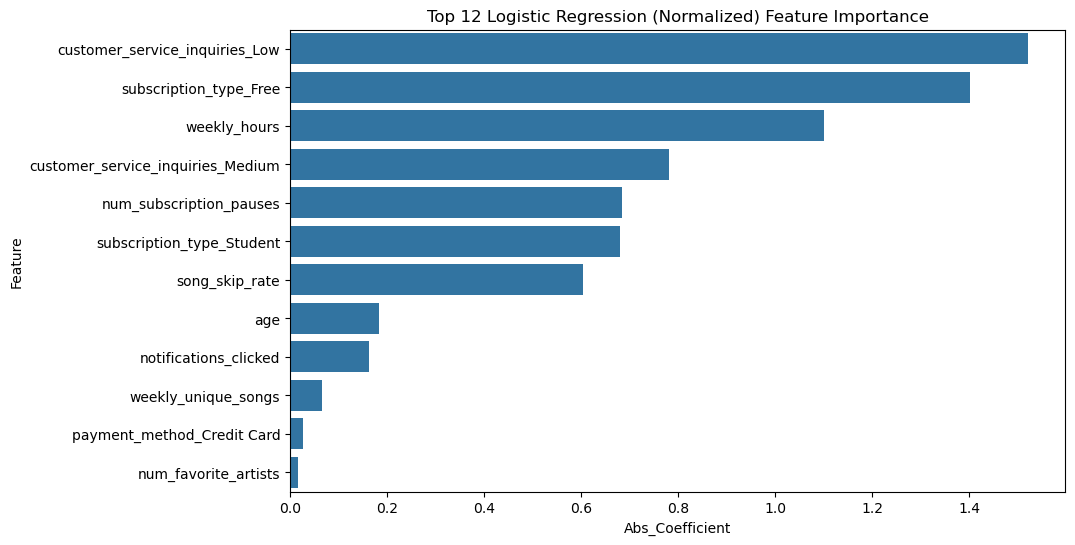

In [215]:
# Get the coefficients from the Logistic Regression model
coefficients = logreg_n.coef_[0]

# Create a DataFrame with feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients to show the most important features
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Select the top 10 most important features
top_10_feature_importance = feature_importance.head(12)

# Plot the top 10 feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=top_10_feature_importance)
plt.title('Top 12 Logistic Regression (Normalized) Feature Importance')
plt.show()


## Random forest Classifier on Unnormalized Data

In [83]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_accuracy_score = accuracy_score(y_test, y_pred_rf)
rf_precision_score = precision_score(y_test, y_pred_rf)
rf_recall_score = recall_score(y_test, y_pred_rf)
rf_roc_auc_score = roc_auc_score(y_test, y_pred_rf)


print(f'Random Forest Accuracy: {rf_accuracy_score}')
print(f'Random Forest Precision: {rf_precision_score}')
print(f'Random Forest Recall: {rf_recall_score}')
print(f'Random Forest AUC-ROC: {rf_roc_auc_score}')


Random Forest Accuracy: 0.865
Random Forest Precision: 0.8137254901960784
Random Forest Recall: 0.9120879120879121
Random Forest AUC-ROC: 0.8688879927412037


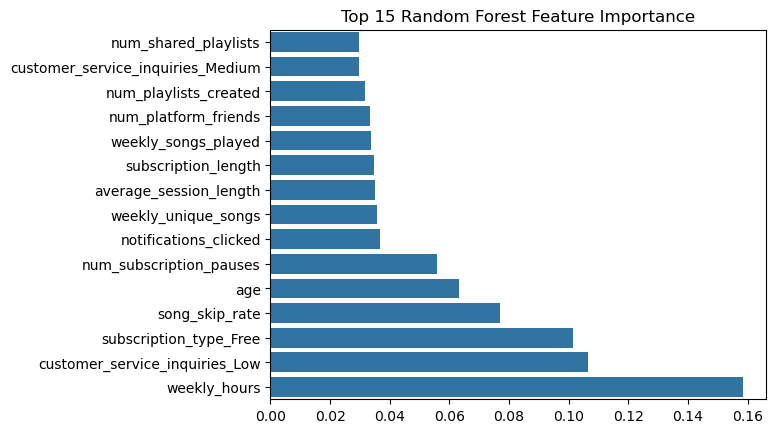

In [212]:
# Get feature importance and sort it in descending order
feature_importance_rf = rf.feature_importances_
sorted_idx_rf = feature_importance_rf.argsort()  # Sort indices based on importance

# Get top 12 features
top_12_idx = sorted_idx_rf[-15:]  # Get indices of the top 12 features
top_12_features = [X.columns[i] for i in top_12_idx]  # Get feature names
top_12_importance = feature_importance_rf[top_12_idx]  # Get top 12 importance values

# Plot top 12 features
sns.barplot(x=top_12_importance, y=top_12_features)
plt.title('Top 15 Random Forest Feature Importance')
plt.show()


## Random forest Classifier on Normalized Data

In [126]:
rf_n = RandomForestClassifier(n_estimators=100, random_state=42)
rf_n.fit(X_train_scaled, y_train)
y_pred_rf_normalized = rf_n.predict(X_test_scaled)


rf_accuracy_score_normalized = accuracy_score(y_test, y_pred_rf_normalized)
rf_precision_score_normalized = precision_score(y_test, y_pred_rf_normalized)
rf_recall_score_normalized = recall_score(y_test, y_pred_rf_normalized)
rf_roc_auc_score_normalized = roc_auc_score(y_test, y_pred_rf_normalized)


print(f'Random Forest (normalized) Accuracy: {rf_accuracy_score_normalized}')
print(f'Random Forest (normalized) Precision: {rf_precision_score_normalized}')
print(f'Random Forest (normalized) Recall: {rf_recall_score_normalized}')
print(f'Random Forest (normalized) AUC-ROC: {rf_roc_auc_score_normalized}')

Random Forest (normalized) Accuracy: 0.865
Random Forest (normalized) Precision: 0.8137254901960784
Random Forest (normalized) Recall: 0.9120879120879121
Random Forest (normalized) AUC-ROC: 0.8688879927412037


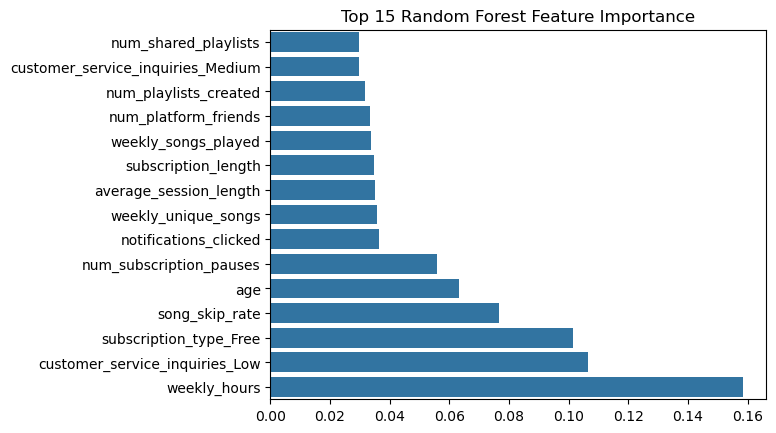

In [211]:
# Get feature importance and sort it in descending order
feature_importance_rf = rf_n.feature_importances_
sorted_idx_rf = feature_importance_rf.argsort()  # Sort indices based on importance

# Get top 12 features
top_12_idx = sorted_idx_rf[-15:]  # Get indices of the top 12 features
top_12_features = [X.columns[i] for i in top_12_idx]  # Get feature names
top_12_importance = feature_importance_rf[top_12_idx]  # Get top 12 importance values

# Plot top 12 features
sns.barplot(x=top_12_importance, y=top_12_features)
plt.title('Top 15 Random Forest Feature Importance')
plt.show()


## XGBoost Classifier on Unnormalized Data

In [85]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate XGBoost
xgb_accuracy_score = accuracy_score(y_test, y_pred_xgb)
xgb_precision_score = precision_score(y_test, y_pred_xgb)
xgb_recall_score = recall_score(y_test, y_pred_xgb)
xgb_roc_auc_score = roc_auc_score(y_test, y_pred_xgb)

print(f'XGBoost Accuracy: {xgb_accuracy_score}')
print(f'XGBoost Precision: {xgb_precision_score}')
print(f'XGBoost Recall: {xgb_recall_score}')
print(f'XGBoost AUC-ROC: {xgb_roc_auc_score}')


XGBoost Accuracy: 0.87
XGBoost Precision: 0.8350515463917526
XGBoost Recall: 0.8901098901098901
XGBoost AUC-ROC: 0.871660449642101


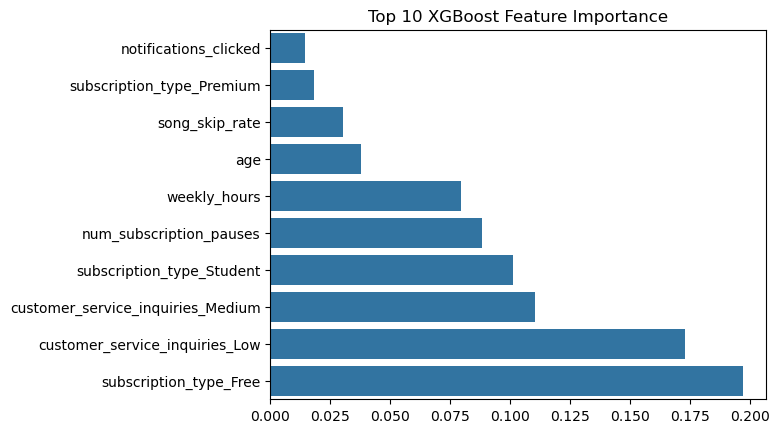

In [207]:
# Get feature importance and sort it in descending order
feature_importance = xgb.feature_importances_
sorted_idx = feature_importance.argsort()  # Sort indices based on importance

# Get top 10 features
top_10_idx = sorted_idx[-10:]  # Get indices of the top 10 features
top_10_features = [X.columns[i] for i in top_10_idx]  # Get feature names
top_10_importance = feature_importance[top_10_idx]  # Get top 10 importance values

# Plot top 10 features
sns.barplot(x=top_10_importance, y=top_10_features)
plt.title('Top 10 XGBoost Feature Importance')
plt.show()


## XGBoost Classifier on normalized Data

In [129]:
xgb_n = XGBClassifier(random_state=42)
xgb_n.fit(X_train_scaled, y_train)
y_pred_xgb_normalized = xgb_n.predict(X_test_scaled)

# Evaluate XGBoost
xgb_accuracy_score_normalized = accuracy_score(y_test, y_pred_xgb_normalized)
xgb_precision_score_normalized = precision_score(y_test, y_pred_xgb_normalized)
xgb_recall_score_normalized = recall_score(y_test, y_pred_xgb_normalized)
xgb_roc_auc_score_normalized = roc_auc_score(y_test, y_pred_xgb_normalized)

print(f'XGBoost (normalized) Accuracy: {xgb_accuracy_score_normalized}')
print(f'XGBoost (normalized) Precision: {xgb_precision_score_normalized}')
print(f'XGBoost (normalized) Recall: {xgb_recall_score_normalized}')
print(f'XGBoost (normalized) AUC-ROC: {xgb_roc_auc_score_normalized}')


XGBoost (normalized) Accuracy: 0.87
XGBoost (normalized) Precision: 0.8282828282828283
XGBoost (normalized) Recall: 0.9010989010989011
XGBoost (normalized) AUC-ROC: 0.8725677991733037


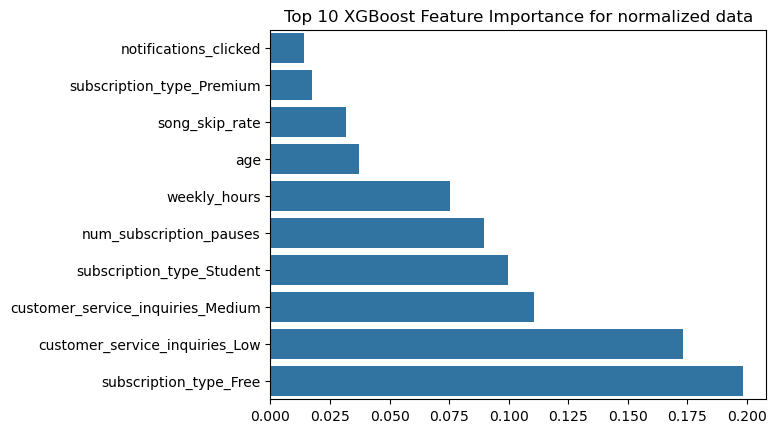

In [208]:
# Get feature importance and sort it in descending order
feature_importance = xgb_n.feature_importances_
sorted_idx = feature_importance.argsort()  # Sort indices based on importance

# Get top 10 features
top_10_idx = sorted_idx[-10:]  # Get indices of the top 10 features
top_10_features = [X.columns[i] for i in top_10_idx]  # Get feature names
top_10_importance = feature_importance[top_10_idx]  # Get top 10 importance values

# Plot top 10 features
sns.barplot(x=top_10_importance, y=top_10_features)
plt.title('Top 10 XGBoost Feature Importance for normalized data')
plt.show()


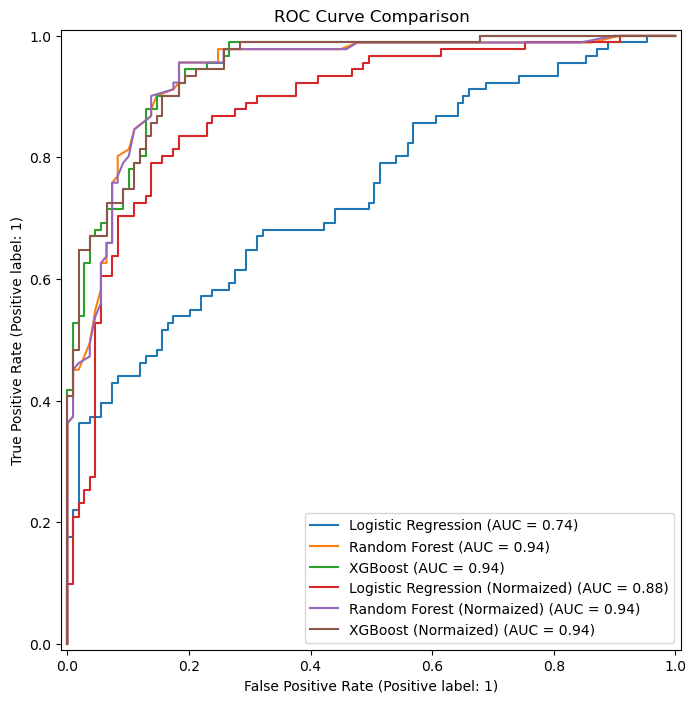

In [146]:
# Plot ROC curve for each model
fig, ax = plt.subplots(figsize=(8, 12))

RocCurveDisplay.from_estimator(logreg, X_test, y_test, ax=ax, name="Logistic Regression")
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax, name="Random Forest")
RocCurveDisplay.from_estimator(xgb, X_test, y_test, ax=ax, name="XGBoost")

RocCurveDisplay.from_estimator(logreg_n, X_test_scaled, y_test, ax=ax, name="Logistic Regression (Normaized)")
RocCurveDisplay.from_estimator(rf_n, X_test_scaled, y_test, ax=ax, name="Random Forest (Normaized)")
RocCurveDisplay.from_estimator(xgb_n, X_test_scaled, y_test, ax=ax, name="XGBoost (Normaized)")

plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# ---------------------------------------------------

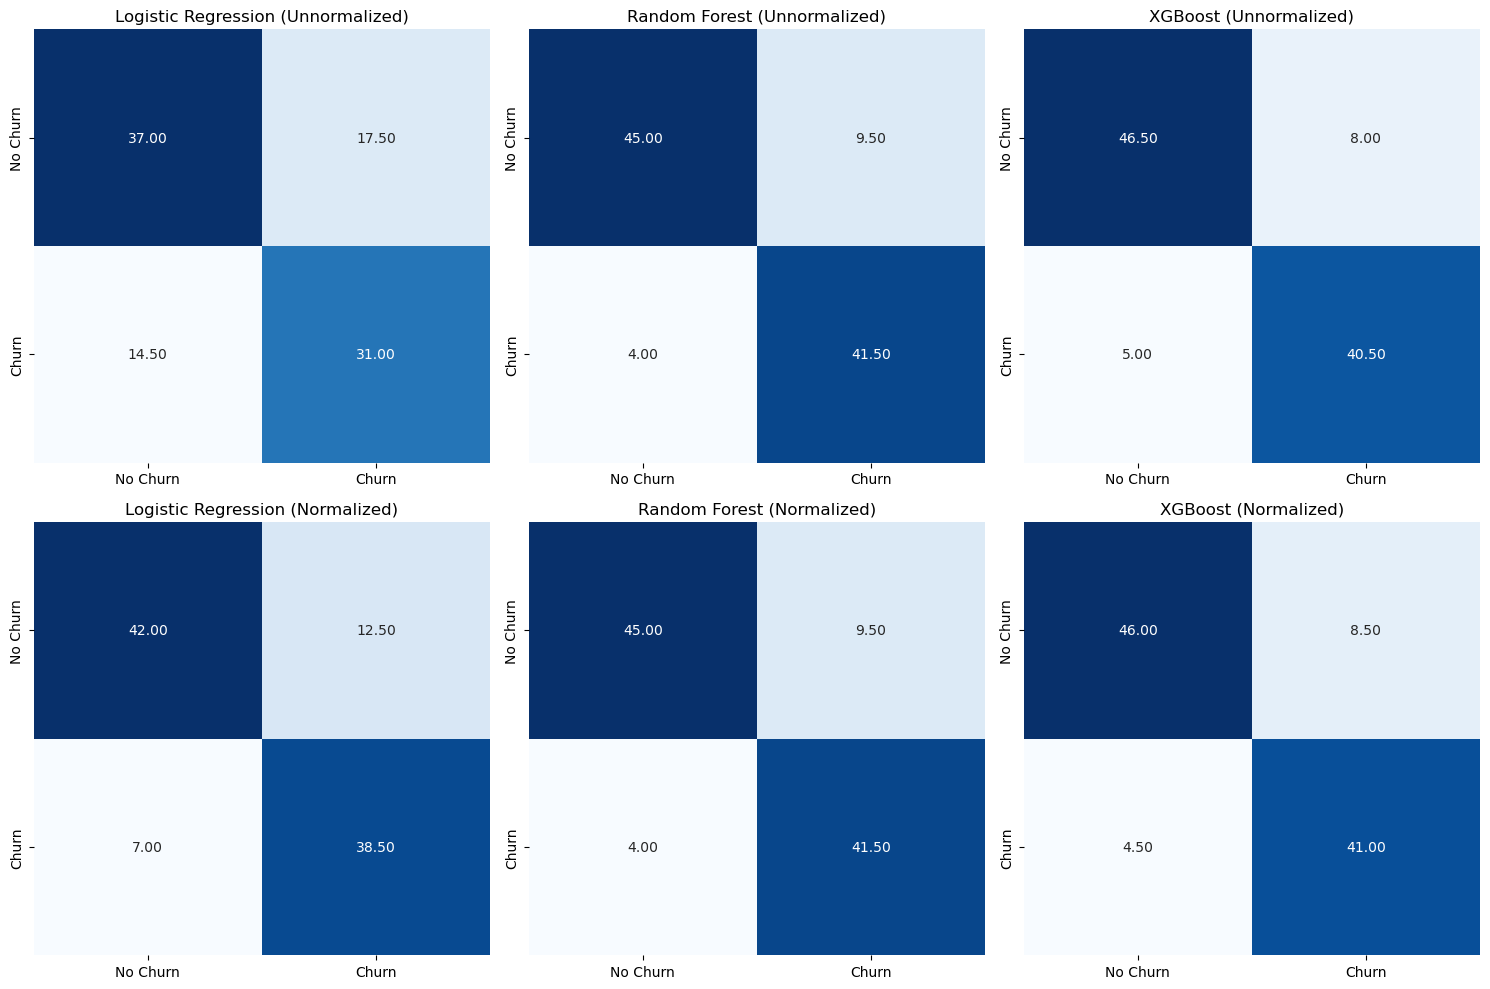

In [104]:
n = y_test.shape
# Create confusion matrices
cm_log_reg = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

cm_log_reg_scaled = confusion_matrix(y_test, y_pred_logreg_normalized)
cm_rf_scaled = confusion_matrix(y_test, y_pred_rf_normalized)
cm_xgb_scaled = confusion_matrix(y_test, y_pred_xgb_normalized)

# Normalize the confusion matrices to show percentages
cm_log_reg_percentage = cm_log_reg.astype('float') / n * 100
cm_rf_percentage = cm_rf.astype('float') / n * 100
cm_xgb_percentage = cm_xgb.astype('float') / n * 100

cm_log_reg_scaled_percentage = cm_log_reg_scaled.astype('float') / n * 100
cm_rf_scaled_percentage = cm_rf_scaled.astype('float') / n * 100
cm_xgb_scaled_percentage = cm_xgb_scaled.astype('float') / n* 100

# Plot confusion matrices in a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Unnormalized data (Row 1)
sns.heatmap(cm_log_reg_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=axs[0, 0], 
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
axs[0, 0].set_title('Logistic Regression (Unnormalized)')

sns.heatmap(cm_rf_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=axs[0, 1], 
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
axs[0, 1].set_title('Random Forest (Unnormalized)')

sns.heatmap(cm_xgb_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=axs[0, 2], 
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
axs[0, 2].set_title('XGBoost (Unnormalized)')

# Normalized data (Row 2)
sns.heatmap(cm_log_reg_scaled_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=axs[1, 0], 
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
axs[1, 0].set_title('Logistic Regression (Normalized)')

sns.heatmap(cm_rf_scaled_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=axs[1, 1], 
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
axs[1, 1].set_title('Random Forest (Normalized)')

sns.heatmap(cm_xgb_scaled_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=axs[1, 2], 
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
axs[1, 2].set_title('XGBoost (Normalized)')

# Adjust layout
plt.tight_layout()
plt.show()


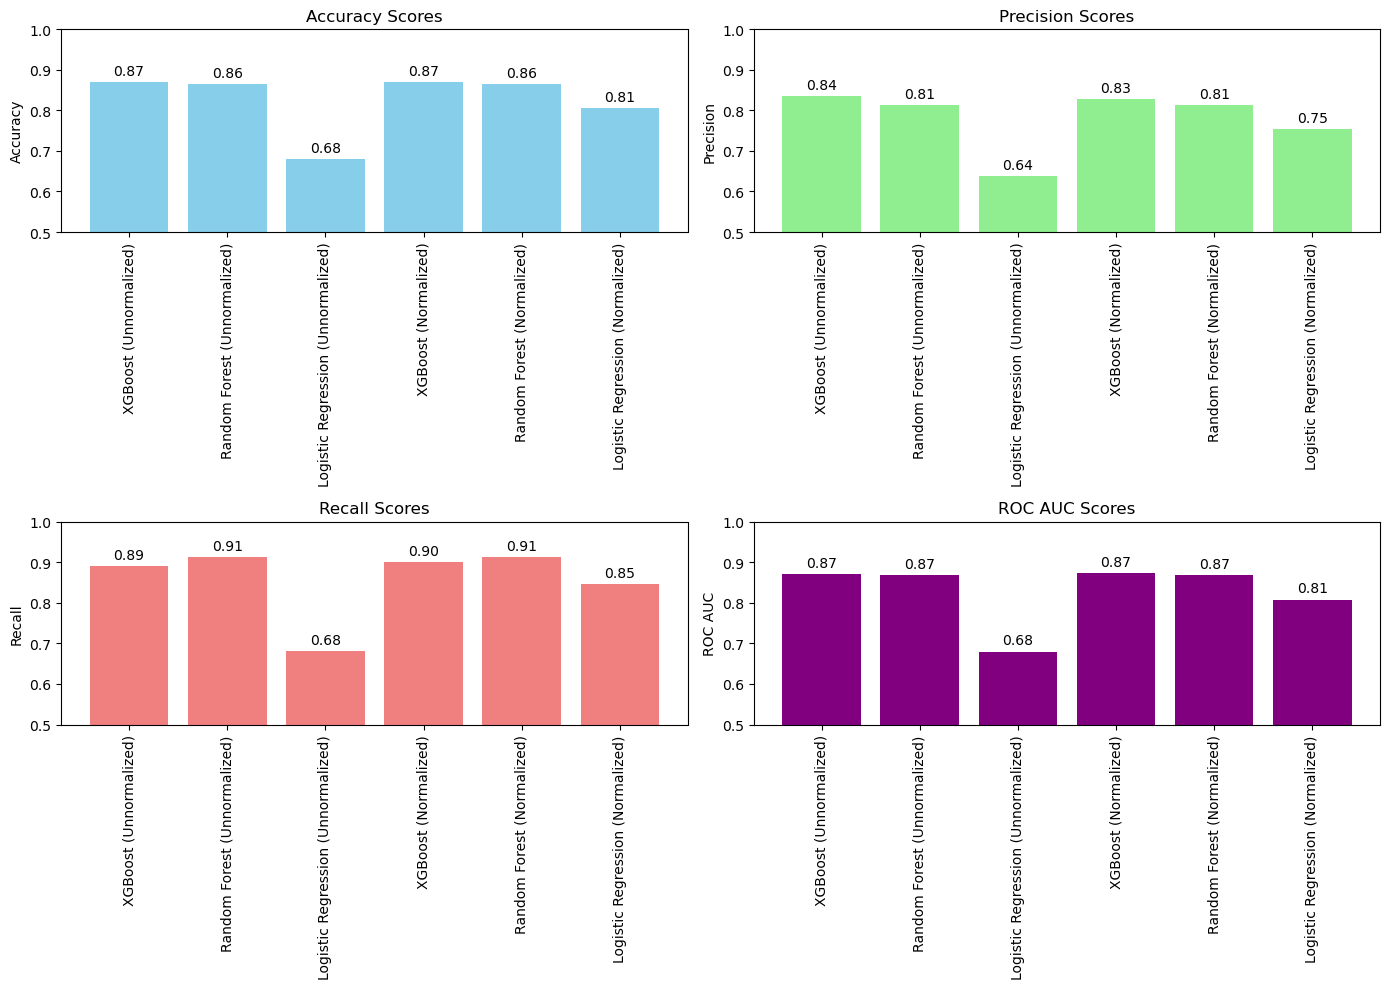

In [116]:
import matplotlib.pyplot as plt

# Define the scores for unnormalized and normalized models
accuracy_scores = [xgb_accuracy_score, rf_accuracy_score, logreg_accuracy_score,
                   xgb_accuracy_score_normalized, rf_accuracy_score_normalized, logreg_accuracy_score_normalized]

precision_scores = [xgb_precision_score, rf_precision_score, logreg_precision_score,
                    xgb_precision_score_normalized, rf_precision_score_normalized, logreg_precision_score_normalized]

recall_scores = [xgb_recall_score, rf_recall_score, logreg_recall_score,
                 xgb_recall_score_normalized, rf_recall_score_normalized, logreg_recall_score_normalized]

roc_auc_scores = [xgb_roc_auc_score, rf_roc_auc_score, logreg_roc_auc_score,
                  xgb_roc_auc_score_normalized, rf_roc_auc_score_normalized, logreg_roc_auc_score_normalized]

# Model names for the labels
model_names = ['XGBoost (Unnormalized)', 'Random Forest (Unnormalized)', 'Logistic Regression (Unnormalized)',
               'XGBoost (Normalized)', 'Random Forest (Normalized)', 'Logistic Regression (Normalized)']

# Create a 2x2 grid of histograms
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Row 1: Accuracy and Precision histograms
axs[0, 0].bar(model_names, accuracy_scores, color='skyblue')
axs[0, 0].set_title('Accuracy Scores')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].tick_params(axis='x', rotation=90)
axs[0, 0].set_ylim(0.5, 1)  # Set y-axis range from 0.5 to 1
for i, value in enumerate(accuracy_scores):
    axs[0, 0].text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

axs[0, 1].bar(model_names, precision_scores, color='lightgreen')
axs[0, 1].set_title('Precision Scores')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].tick_params(axis='x', rotation=90)
axs[0, 1].set_ylim(0.5, 1)  # Set y-axis range from 0.5 to 1
for i, value in enumerate(precision_scores):
    axs[0, 1].text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Row 2: Recall and ROC AUC histograms
axs[1, 0].bar(model_names, recall_scores, color='lightcoral')
axs[1, 0].set_title('Recall Scores')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].tick_params(axis='x', rotation=90)
axs[1, 0].set_ylim(0.5, 1)  # Set y-axis range from 0.5 to 1
for i, value in enumerate(recall_scores):
    axs[1, 0].text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

axs[1, 1].bar(model_names, roc_auc_scores, color='purple')
axs[1, 1].set_title('ROC AUC Scores')
axs[1, 1].set_ylabel('ROC AUC')
axs[1, 1].tick_params(axis='x', rotation=90)
axs[1, 1].set_ylim(0.5, 1)  # Set y-axis range from 0.5 to 1
for i, value in enumerate(roc_auc_scores):
    axs[1, 1].text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()
